In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("train.csv")


In [29]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


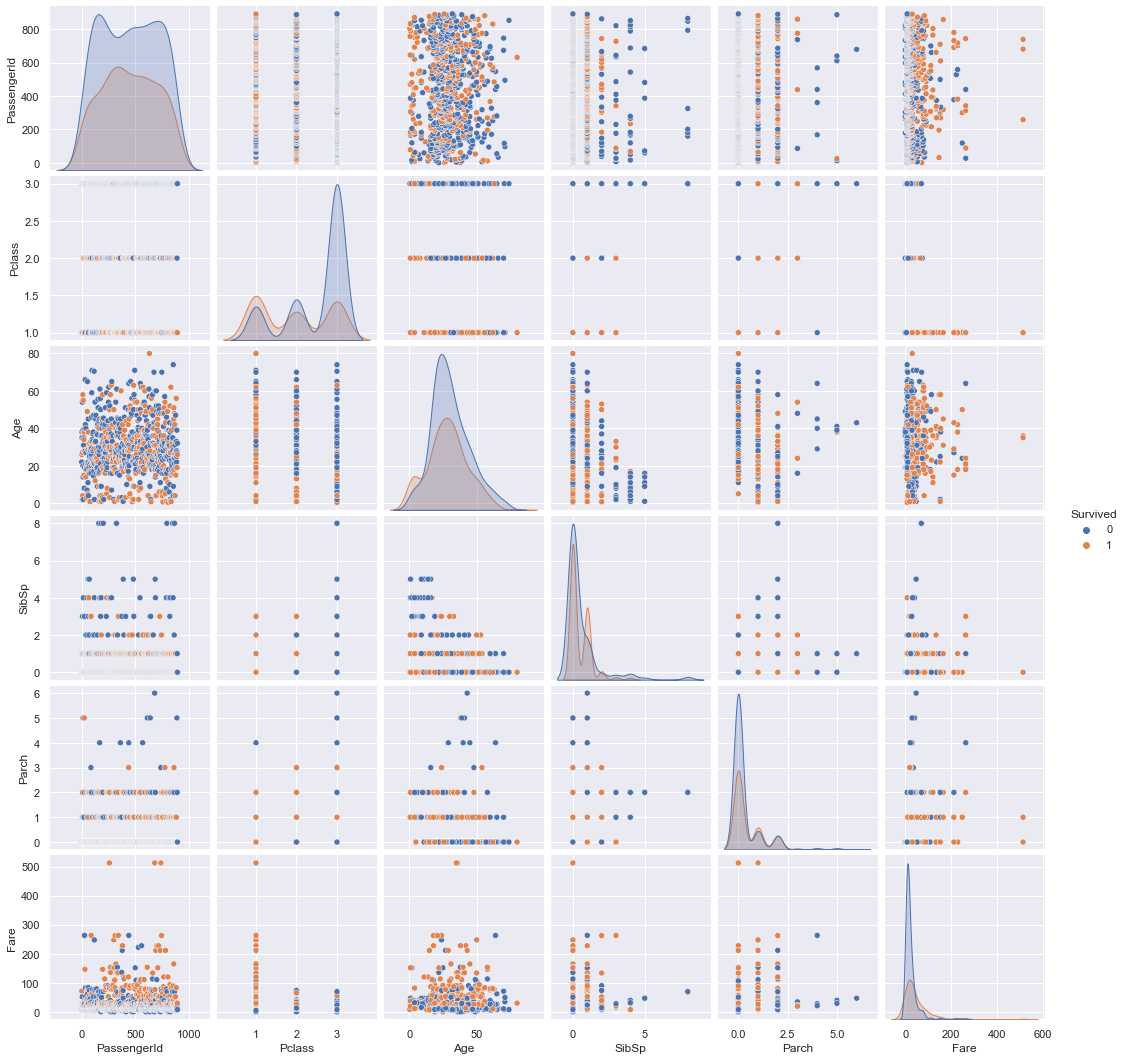

In [30]:
sns.pairplot(df, hue='Survived')

In [32]:
#impute missing value for "Age" variable with mean
df_impute_Age= df.fillna(value=df["Age"].mean())
df_impute_Age.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.415100,12.457370,1.00,23.0,29.699118,35.0,74.0
1,342.0,28.549778,13.772498,0.42,21.0,29.699118,35.0,80.0


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

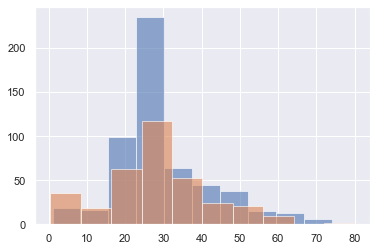

In [33]:
#Survival by Age
df_impute_Age.groupby('Survived').Age.hist(alpha=0.6)

In [34]:
df_impute_Age.groupby('Survived').Pclass.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


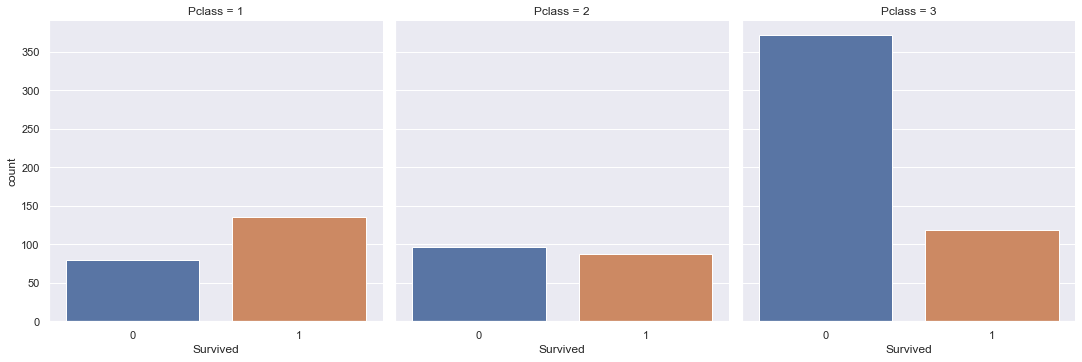

In [35]:
#Survival by Class
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_impute_Age)

In [36]:
df_impute_Age.groupby('Survived').Sex.describe()

,count,unique,top,freq
Survived,,,,
0,549,2,male,468
1,342,2,female,233


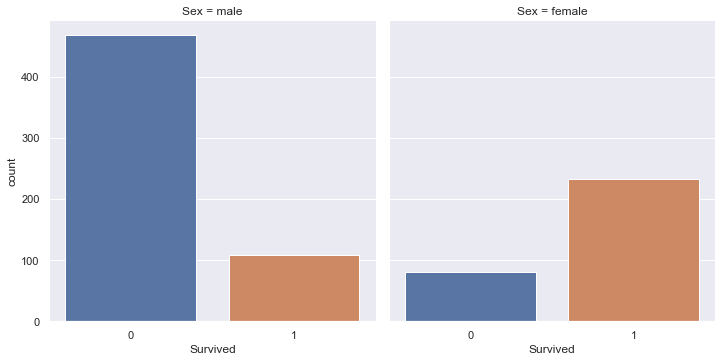

In [37]:
#Survival by Sex
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_impute_Age)

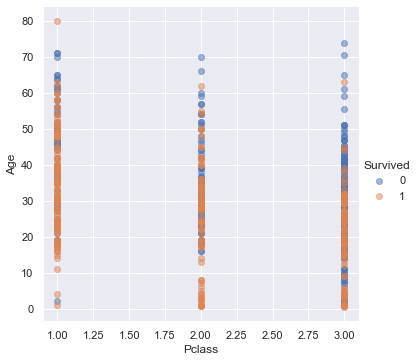

In [38]:
sns.lmplot(x='Pclass', y='Age',hue='Survived', data=df_impute_Age, fit_reg=False, scatter_kws={'alpha':0.5})

In [39]:
fig = plt.figure(figsize=(20,5), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.5

#Survival Distribution
ax1 = plt.subplot2grid((3,3),(0,0))
             
df_impute_Age.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Survival Distribution, (1 = Survived)")    

#Sex Distribution
ax1 = plt.subplot2grid((3,3),(0,1))
             
df_impute_Age.Sex.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

ax1.set_xlim(-1, 2)

plt.title("Sex Distribution")    

#Class Distribution
ax3 = plt.subplot2grid((3,3),(0,2))
df_impute_Age.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df_impute_Age.Pclass.value_counts()))
plt.title("Class Distribution")

#Age Distribution by Class
plt.subplot2grid((3,3),(1,0), colspan=2)

df_impute_Age.Age[df_impute_Age.Pclass == 1].plot(kind='kde')    
df_impute_Age.Age[df_impute_Age.Pclass == 2].plot(kind='kde')
df_impute_Age.Age[df_impute_Age.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution by Class")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

In [ ]:
#Female-Survival by Class
fig = plt.figure(figsize=(20,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_1stclass = df_impute_Age.Survived[df_impute_Age.Sex == 'female'][df_impute_Age.Pclass == 1].value_counts()
female_1stclass.plot(kind='bar', label='female, 1stclass', color='blue', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_1stclass))
plt.title("Female-Survival by Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_2ndclass = df_impute_Age.Survived[df_impute_Age.Sex == 'female'][df_impute_Age.Pclass == 2].value_counts()
female_2ndclass.plot(kind='bar', label='female, 2ndclass', color='red', alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(female_2ndclass))
plt.legend(loc='best')


ax3=fig.add_subplot(143, sharey=ax1)
female_3rdclass = df_impute_Age.Survived[df_impute_Age.Sex == 'female'][df_impute_Age.Pclass == 3].value_counts()
female_3rdclass.plot(kind='bar', label='female, 3rdclass', color='yellow', alpha=alpha_level)
ax3.set_xticklabels(["Survived","Died"], rotation=0)
ax3.set_xlim(-1, len(female_3rdclass))
plt.legend(loc='best')


In [ ]:
#Male-Survival by Class
fig = plt.figure(figsize=(20,5), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
male_1stclass = df_impute_Age.Survived[df_impute_Age.Sex == 'male'][df_impute_Age.Pclass == 1].value_counts()
male_1stclass.plot(kind='bar', label='male, 1stclass',color='blue', alpha=alpha_level)
ax1.set_xticklabels(["Survived","Died"], rotation=0)
ax1.set_xlim(-1, len(male_1stclass))
plt.title("Male-Survival by Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
male_2ndclass = df_impute_Age.Survived[df_impute_Age.Sex == 'male'][df_impute_Age.Pclass == 2].value_counts()
male_2ndclass.plot(kind='bar', label='male, 2ndclass', color='red', alpha=alpha_level)
ax2.set_xticklabels(["Survived","Died"], rotation=0)
ax2.set_xlim(-1, len(male_2ndclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_3rdclass = df_impute_Age.Survived[df_impute_Age.Sex == 'male'][df_impute_Age.Pclass == 3].value_counts()
male_3rdclass.plot(kind='bar', label='male, 3rdclass', color='yellow', alpha=alpha_level)
ax3.set_xticklabels(["Survived","Died"], rotation=0)
ax3.set_xlim(-1, len(male_3rdclass))
plt.legend(loc='best')